# import libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

### merging data together using pd.concat


In [4]:
df1 = pd.read_csv("Sales_April_2019.csv")
df2= pd.read_csv("Sales_January_2019.csv")
df3 = pd.read_csv("Sales_February_2019.csv")
df4 = pd.read_csv("Sales_March_2019.csv")
df5 = pd.read_csv("Sales_May_2019.csv")
df6 = pd.read_csv("Sales_June_2019.csv")
df7 = pd.read_csv("Sales_July_2019.csv")
df9 = pd.read_csv("Sales_August_2019.csv")
df8 = pd.read_csv("Sales_September_2019.csv")
#merging the files
df_merge = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], axis = 0)
#saving the file as new csv file
df_merge.to_csv('merge_file.csv', index= False)




### reading our newly merged file

In [52]:
df1 = pd.read_csv("merge_file.csv")


### cleaning data

In [53]:
#checking rows with Nan
mask = df1.isnull().any(axis=1)

#dropping nan rows
df1 = df1.dropna()
# dropping rows that contains order id
df1 = df1.drop(df1[df1['Order ID'].str.contains("Order ID")].index)


### splitting column

In [54]:
df1['Month'] = df1['Order Date'].str[0:2]
df1['Month'] = df1['Month'].astype('int32')


### adding a new city column

In [55]:
df1['city'] = df1['Purchase Address'].apply(lambda x: x.split(',')[1])


### covert data to correct type and create sales column

In [56]:
df1['Quantity Ordered'] = pd.to_numeric(df1['Quantity Ordered'])
df1['Price Each'] = pd.to_numeric(df1['Price Each'])
df1['Sales'] = df1['Quantity Ordered'] * df1['Price Each']


### finding which month had highest sales

In [57]:
result = df1.groupby('Month').sum()


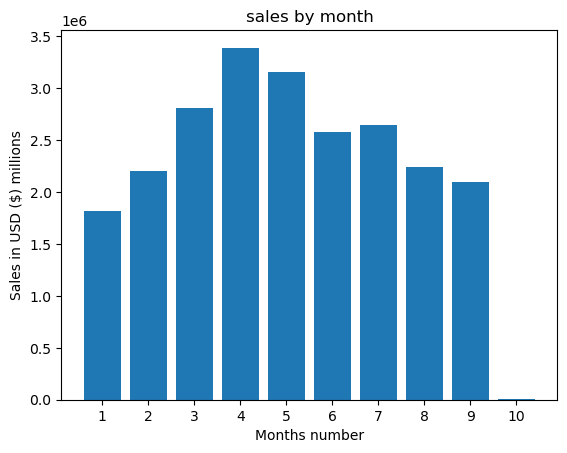

In [58]:
months = range(1,11)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($) millions')
plt.xlabel('Months number')
plt.title('sales by month')
plt.show()

From our analysis above we can see that month 4(april) has the highest amount of sales

what city has the highest amount of sales?

In [59]:
results = df1.groupby('city').sum()


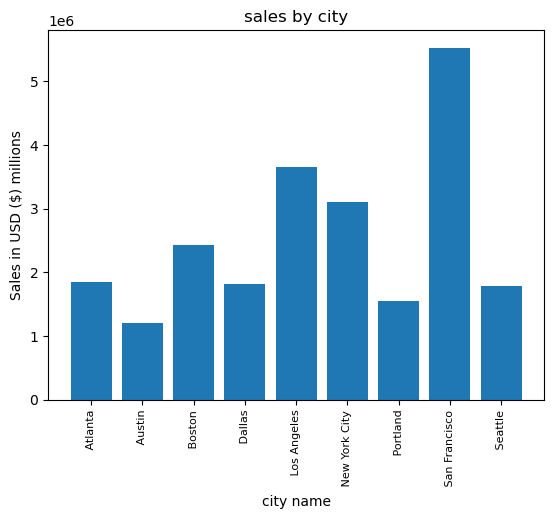

In [60]:
cities = [city for city, df in df1.groupby('city')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($) millions')
plt.xlabel('city name')
plt.title('sales by city')
plt.show()

### discovering time to display advertisement to maximize product purchase.

In [61]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Hour'] = df1['Order Date'].dt.hour
df1['minutes'] = df1['Order Date'].dt.minute


### Getting the best hour and minutes of purchases

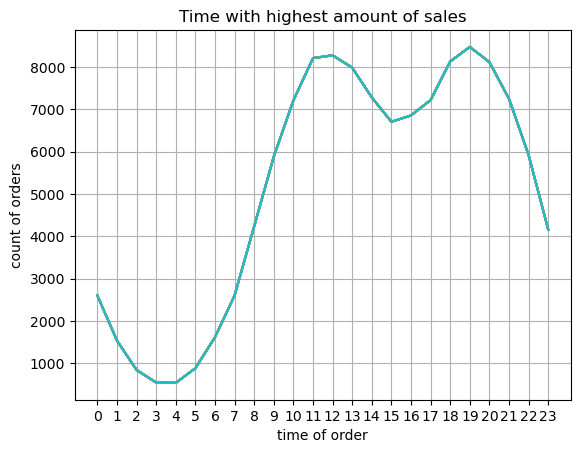

In [62]:
hours = [hour for hour, df in df1.groupby('Hour')]
plt.plot(hours, df1.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("time of order")
plt.ylabel('count of orders')
plt.grid()
plt.title('Time with highest amount of sales')
plt.show()

from the above diagram we can see that 12pm(12) and 7pm (19) are the time we see the highest amount of orders during the day.

### finding product that sold the most.

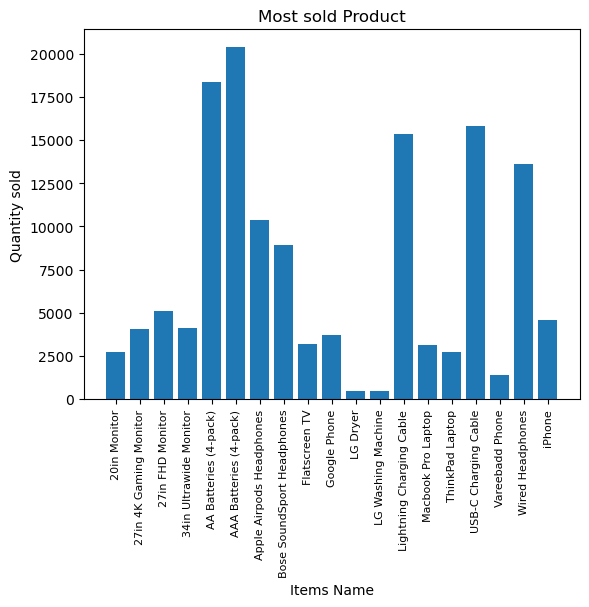

In [68]:
product_quantity= df1.groupby('Product')
quantity_ordered = product_quantity.sum()['Quantity Ordered']
product = [product for product, df in product_quantity]
plt.bar(product, quantity_ordered)
plt.xticks(product, rotation ='vertical', size =8)
plt.xlabel('Items Name')
plt.ylabel('Quantity sold')
plt.title("Most sold Product")
plt.show()

let find out why (AAA batteries) was the most sold product in the above barchart

C:\Users\MMX\AppData\Local\Temp\ipykernel_2484\1705913665.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical', size =8)


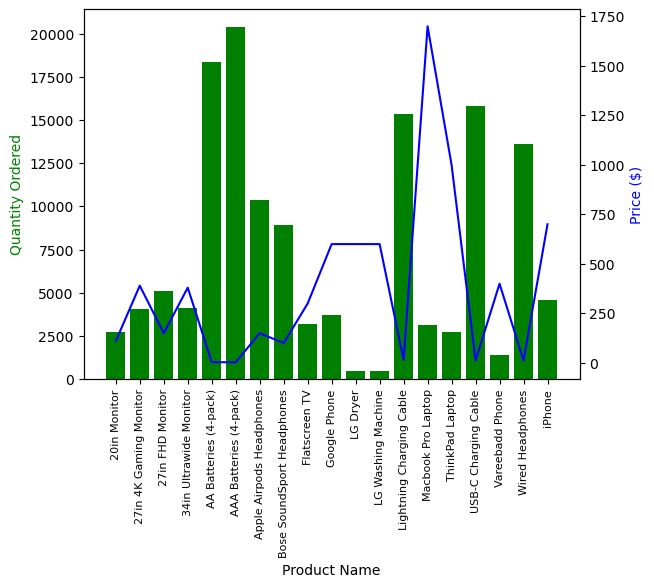

In [82]:
prices = df1.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered,color = 'g')
ax2.plot(product, prices,'b-')
ax1.set_xticklabels(product, rotation = 'vertical', size =8)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color= 'g')
ax2.set_ylabel('Price ($)', color = 'b')

plt.show()
